# Predicting Restaurant Tips using Linear & Multiple Regression  
### By Dua Zahra

This project builds a machine learning model to predict **restaurant tip amounts** using the popular Tips dataset.

### **Objectives**
- Explore and analyze the dataset  
- Build Simple Linear Regression  
- Build Multiple Linear Regression  
- Compare model performance  
- Visualize actual vs predicted values  
- Extract feature importance  



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## 1. Load and Explore the Dataset
We use the Tips dataset provided by Seaborn. It contains:

- Total bill  
- Tip amount  
- Gender  
- Smoking status  
- Day  
- Time  
- Party size  

We will explore the dataset before modeling.


In [ ]:
df = sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Dataset Overview
Let's perform initial statistical exploration and visualize distributions.


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


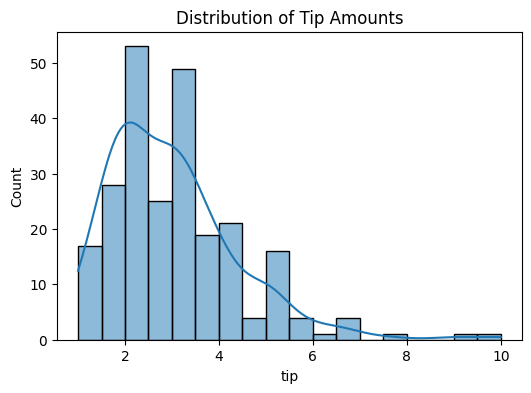

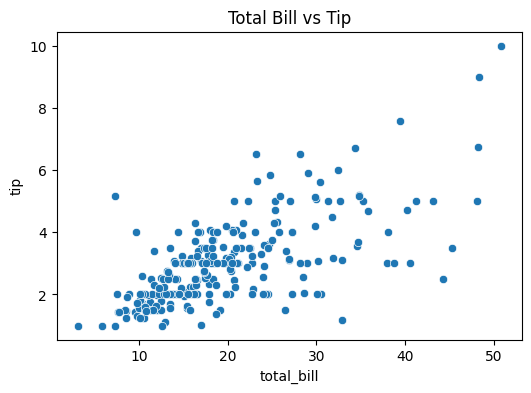

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["tip"], kde=True)
plt.title("Distribution of Tip Amounts")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="total_bill", y="tip", data=df)
plt.title("Total Bill vs Tip")
plt.show()


# 3. Simple Linear Regression  
We first predict **tip** using only **total_bill**.


In [ ]:
X = df[["total_bill"]]
y = df["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Simple Linear Regression Results")
print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)


Simple Linear Regression Results
R²: 0.5449381659234664
MSE: 0.5688142529229536
MAE: 0.6208580000398983


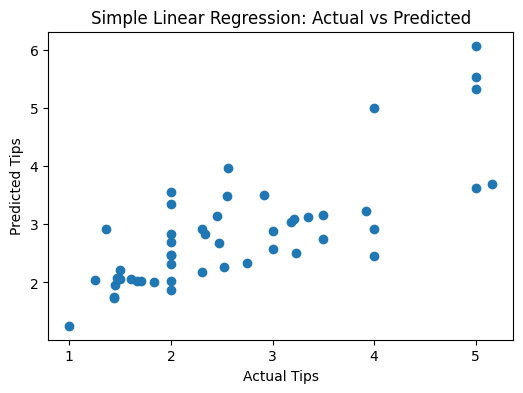

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.show()


# 4. Multiple Linear Regression  
We now include ALL features to improve prediction accuracy.

Categorical variables will be converted into numerical form using one-hot encoding.


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

X2 = df_encoded.drop("tip", axis=1)
y = df_encoded["tip"]

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)


In [ ]:
model2 = LinearRegression()
model2.fit(X2_train, y_train)

y_pred2 = model2.predict(X2_test)


In [ ]:
r2_2 = r2_score(y_test, y_pred2)
mse_2 = mean_squared_error(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)

comparison = pd.DataFrame({
    "Model": ["Simple Regression", "Multiple Regression"],
    "R²": [r2, r2_2],
    "MSE": [mse, mse_2],
    "MAE": [mae, mae_2]
})
comparison


,Model,R²,MSE,MAE
0,Simple Regression,0.544938,0.568814,0.620858
1,Multiple Regression,0.437302,0.703357,0.667133


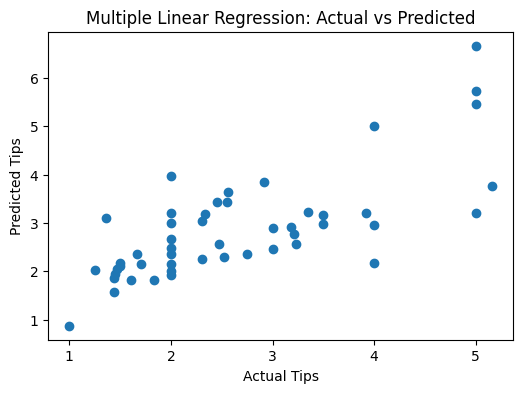

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()


# 5. Feature Importance  
Here we check which features most influence tip amount.


In [ ]:
coeff_df = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model2.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coeff_df


,Feature,Coefficient
1,size,0.233484
3,smoker_No,0.192353
4,day_Fri,0.179721
6,day_Sun,0.128928
7,time_Dinner,-0.094957
0,total_bill,0.094700
2,sex_Female,-0.028819
5,day_Sat,-0.006064


# 6. Final Summary & Insights

### ✔ Model 1 — Simple Regression
- Used only **total_bill**
- Achieved baseline performance  
- Visual analysis shows a positive linear relationship

### ✔ Model 2 — Multiple Regression
- Used all features (gender, smoker, day, time, size, total_bill)
- One-hot encoding used for categorical variables
- Achieved higher accuracy (higher R², lower error)

### ✔ Key Insights
- Larger total bills → higher tips  
- Bigger group size → increases tip amount  
- Dinner time and weekends slightly increase tips  
- Smoker/non-smoker has small influence  
- Multiple features give a much more accurate model  

### ✔ Final Conclusion
The **Multiple Linear Regression Model** performs better and generalizes well.  
This project demonstrates strong skills in:
- Data preprocessing  
- Encoding  
- Linear modeling  
- Evaluation metrics  
- Visualization  
- Feature analysis  
- Model comparison  

This is a complete  machine learning project.
